### Timeseries manipulating

In [ ]:
# Import pandas
import pandas as pd

# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates )

# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds,how='inner')

### Correlation between Timeseries

In [ ]:
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()  ## This step is important

# Compute correlation using corr()
correlation = returns['SP500'].corr(returns['US10Y'])
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
plt.scatter(returns['SP500'],returns['US10Y'])
plt.show()

### Spurious correlation

In [ ]:
# Compute correlation of levels
correlation1 = levels.DJI.corr(levels.UFO)
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes.DJI.corr(changes.UFO)
print("Correlation of changes: ", correlation2)

### Simple linear regression of timeseries
* OLS fit between X and Y
* Find the regression line
* R squared: how the linear regression line fits the dat

### Check if sqrt(R$^{2}$) and Corr are the same

In [ ]:
# Import the statsmodels module
import statsmodels.api as sm

# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
x = pd.DataFrame(x, columns=['x'])

# Add a constant to the DataFrame x
x = sm.add_constant(x)

# Fit the regression of y on x
result = sm.OLS(y,x).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

### Auto-correlation (autocorrelation of a single timeseries of the lag/lead version of itself)
* For financial timeseries: (1) mean reversion (2) trend following / momentum

In [ ]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W', how='last')

# Compute the percentage change of prices
returns = MSFT.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

#### Are Interest Rates Autocorrelated?
And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

In [ ]:
# Compute the daily change in interest rates 
daily_data['change_rates'] = daily_data.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_data['change_rates'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
annual_data = daily_data['US10Y'].resample(rule='A', how='last')

# Repeat above for annual data
annual_data['diff_rates'] = annual_data.diff()
autocorrelation_annual = annual_data['diff_rates'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_annual))

### Sample Autocorrelation function
* Autocorr of all lag
* Significant auto correlation can be used to forecast
* For model selection

In [ ]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB,alpha=1)
plt.show()

### IF the autocorr of MSFT is significant

In [ ]:
# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20)
plt.show()

### White noises
* constant mean
* constant std
* zero auto-correlation at all lags

In [ ]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Simulate wite noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

### Random Walk
* today's price is yesterdays' price add some noise(this part is random)
* You can forecast a random walk process
* best guess of tomorrow is today's price
* Stock price is like a random walk with a drift ($\mu$)
* Dickey-Fuller test

Whereas stock returns are often modelled as white noise, stock prices closely follow a random walk. In other words, today's price is yesterday's price plus some random noise.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

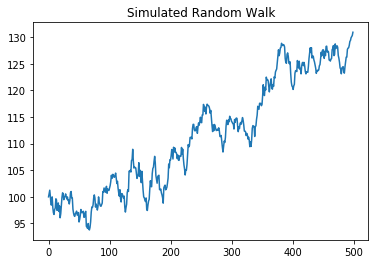

In [3]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

### Get the drift
* Many time series, like stock prices, are random walks but tend to drift up over time.
* Now you will make the noise multiplicative: you will add one to the random, normal changes to get a total return, and multiply that by the last price.

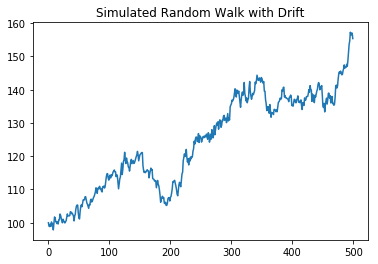

In [4]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

### "Augmented Dickey-Fuller Test" from the statsmodels library to show that it does indeed follow a random walk.

In [ ]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

#### If the Stock return is the random walk

In [ ]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

## Stationarity
* Strong: the distribution is time-invariant
* Weak: mean, std, autocorrelation are time-invariant

For non-stationary data
* difficult to model
* Seasonal series is not stationary
* If there is trend, is non stationary

Do transformation to make data stationary first

#### Seasonal adjustment

In [ ]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

# Drop the NaN data in the first three three rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()

### Autoregressive Model (AR model)

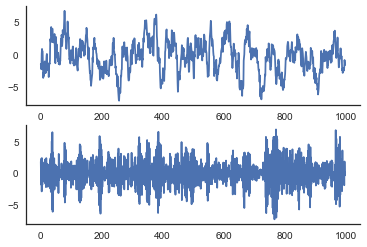

In [12]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

sns.set_style("white")
# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
sns.despine()
plt.show()

In [11]:
ar3 = np.array([1, -0.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)

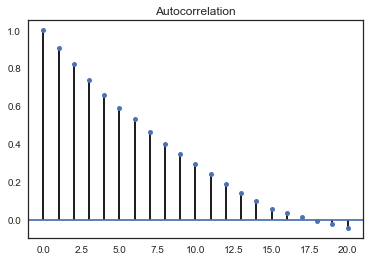

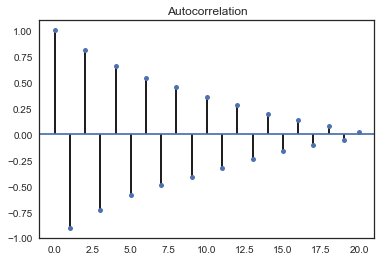

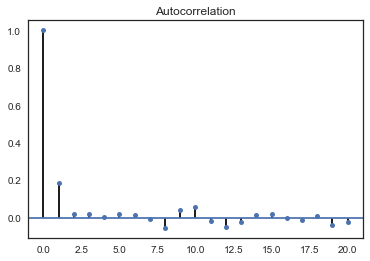

In [13]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

### Fit an ARMA model to given timeseries to estimate parameters.

In [ ]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

In [ ]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

### Predict the interest rate

In [ ]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast interest rates using an AR(1) model
mod = ARMA(interest_rate_data, order=(1,0))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=0,end='2022')
plt.legend(fontsize=8)
plt.show()

### Compare AR Model with Random Walk


In [ ]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot the interest rate series and the simulated random walk series side-by-side
fig, axes = plt.subplots(2,1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=1, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data, alpha=1, lags=12, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.show()

### How to choose the right model?
* Partial Autocorrelation Function
* Information criteria
   * Akaike Information Criteria (AIC)
   * Bayesian Information Criteria (BIC)

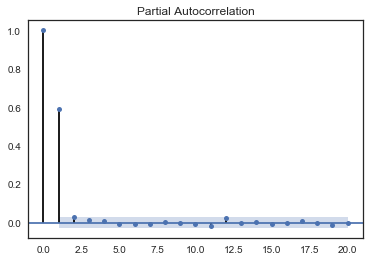

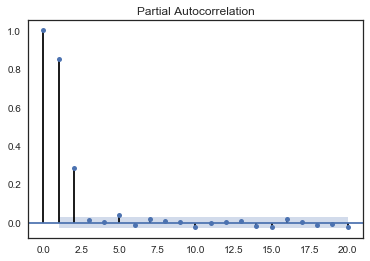

In [14]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

### BIC as a criteria

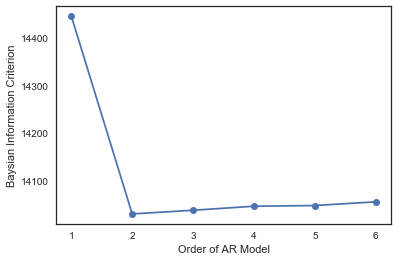

In [15]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Baysian Information Criterion')
plt.show()

### MA(1) model
As in the last chapter, when inputting the coefficients, you must include the zero-lag coefficient of 1, but unlike the last chapter on AR models, the sign of the MA coefficients is what we would expect.

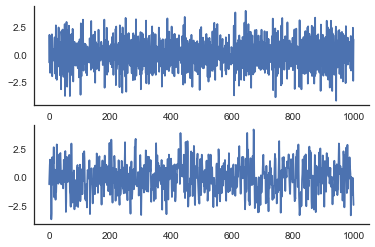

In [17]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
sns.despine()
plt.show()

In [ ]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot three ACF on same page for comparison using subplots
fig, axes = plt.subplots(3,1)

# Plot 1: AR parameter = -0.9
plot_acf(simulated_data_1, lags=20, ax=axes[0])
axes[0].set_title("MA Parameter -0.9")

# Plot 2: AR parameter = +0.9
plot_acf(simulated_data_2, lags=20, ax=axes[1])
axes[1].set_title("MA Parameter +0.9")

# Plot 3: AR parameter = -0.3
plot_acf(simulated_data_3, lags=20, ax=axes[2])
axes[2].set_title("MA Parameter -0.3")
plt.show()

### Fit the model to get MA model.

In [18]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the consant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1427.779
Method:                       css-mle   S.D. of innovations              1.008
Date:                Thu, 19 Apr 2018   AIC                           2861.557
Time:                        10:59:53   BIC                           2876.281
Sample:                             0   HQIC                          2867.153
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.003     -0.276      0.782      -0.006       0.005
ma.L1.y       -0.9112      0.012    -77.405      0.000      -0.934      -0.888
                                    Roots           

### Forecasting with the fitted MR model

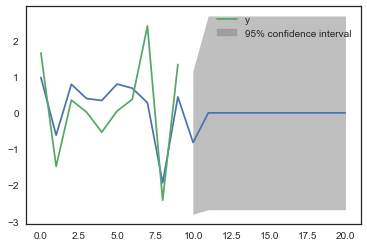

In [19]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first MA(1) model
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

### Intraday Stock Price:

In [ ]:
# import datetime module
import datetime

# Change the first date to zero
intraday.iloc[0,0] = 0

# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE','CLOSE']

# Examine the data types for each column
print(intraday.dtypes)

# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday.DATE)

# Make the `DATE` column the new index
intraday = intraday.set_index('DATE')

In [ ]:
# Notice that some rows are missing
print("The length of the DataFrame is: ",len(intraday))

# Find the missing rows
print("Missing rows: ", set(range(391)) - set(intraday.index))

# Fill in the missing rows
intraday = intraday.reindex(range(391), method='ffill')

# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-08-28 9:30', end='2017-08-28 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True)
plt.show()

### Fit MA(1) model

In [ ]:
# Import plot_acf and ARMA modules from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA

# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60)
plt.show()

# Fit the data to an MA(1) model
mod = ARMA(returns, order=(0,1))
res = mod.fit()
print(res.params)

### AR(1) == MA($\infty$)

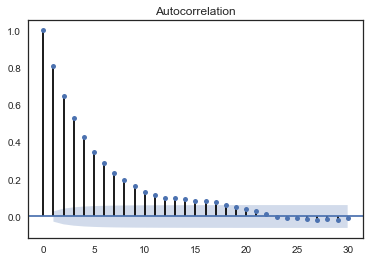

In [20]:
# import the modules for simulating data and plotting the ACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Build a list MA parameters
ma = [0.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()

### Co-Integrating: Combination of two random-walk can be not

In [ ]:
# Plot the prices separately
plt.subplot(2,1,1)
plt.plot(7.25*HO, label='Heating Oil')
plt.plot(NG, label='Natural Gas')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(7.25*HO-NG, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

In [ ]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Compute the ADF for HO and NG
result_HO = adfuller(HO['Close'])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(NG['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller(7.25 * HO['Close'] - NG['Close'])
print("The p-value for the ADF test on the spread is ", result_spread[1])

### Are Bitcoin and Ethereum Cointegrated?

In [ ]:
# Import the statsmodels module for regression and the adfuller function
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Regress BTC on ETH
ETH = sm.add_constant(ETH)
result = sm.OLS(BTC,ETH).fit()

# Compute ADF
b = result.params[1]
adf_stats = adfuller(BTC['Price'] - b*ETH['Price'])
print("The p-value for the ADF test is ", adf_stats[1])

### Final Exercise: Climate Change:

An ARMA model is a simplistic approach to forecasting climate changes, but it illustrates many of the topics covered in this class.

Data can be found [here](https://www.ncdc.noaa.gov/cdo-web/search) 

In [32]:
# Load in data 
import pandas as pd
NYcp=pd.read_csv('NY_cp_Temp_precip_1870-2016.csv')
temp_NY=NYcp.TAVG
temp_NY.index=NYcp.DATE

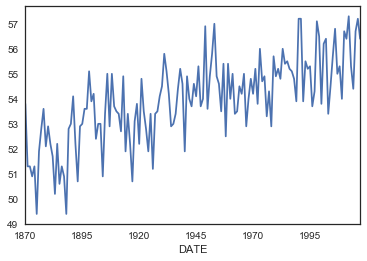

The p-value for the ADF test is  0.617093509258


In [36]:
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

# Convert the index to a datetime object
temp_NY.index = pd.to_datetime(temp_NY.index, format='%Y')

# Plot average temperatures
temp_NY.plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY)
print("The p-value for the ADF test is ", result[1])

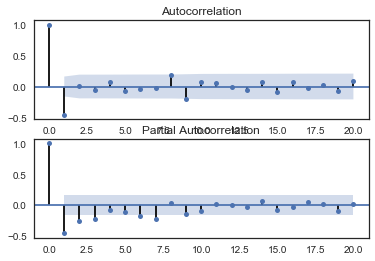

In [37]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

### Fit AR(1), AR(2), MA(1), ARMA(1)
* MA(1) and ARMA(1) perform the best

In [38]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(1) model and print AIC:
mod = ARMA(chg_temp, order=(1,0))
res = mod.fit()
print("The AIC for an AR(1) is: ", res.aic)

# Fit the data to an AR(2) model and print AIC:
mod = ARMA(chg_temp, order=(2,0))
res = mod.fit()
print("The AIC for an AR(2) is: ", res.aic)

# Fit the data to an MA(1) model and print AIC:
mod = ARMA(chg_temp, order=(0,1))
res = mod.fit()
print("The AIC for an MA(1) is: ", res.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod = ARMA(chg_temp, order=(1,1))
res = mod.fit()
print("The AIC for an ARMA(1,1) is: ", res.aic)

The AIC for an AR(1) is:  513.1854318438723
The AIC for an AR(2) is:  504.3066240262616
The AIC for an MA(1) is:  471.6371907841485
The AIC for an ARMA(1,1) is:  471.2381749036215


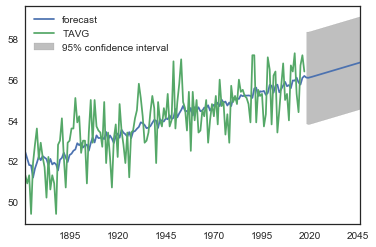

In [39]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA

# Forecast interest rates using an AR(1) model
mod = ARIMA(temp_NY, order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()

According to the model (almost entirely due to the trend, the temperature is expected to be about 0.6 degrees higher in 30 years, but the 95% confidence interval around that is over 5 degrees.

### More Advanced Concepts:
* GARCH models
* Nonlinear Models
* Multivariate Time Series models
* Regime Switching Models
* State Space Models and Kalman Filtering